In [108]:
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
def convert_to_float(value):
    try:
        value = value.replace('.', '').replace(',', '.')
        return float(value)
    except:
        return 0.0

In [110]:
def format_currency(value):
    if value == 0:
        return "R$ 0,00"
    
    scales = [(1, ''), (1e6, 'milhões'), (1e9, 'bilhões'), (1e12, 'trilhões')]
    
    for scale, suffix in scales[::-1]:
        if abs(value) >= scale:
            formatted_value = value / scale
            formatted_value_str = f"{formatted_value:.2f}".replace('.', ',')
            return f"R$ {formatted_value_str} {suffix}"
    
    formatted_value_str = f"{value:.2f}".replace('.', ',')
    return f"R$ {formatted_value_str}"

In [111]:
pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.read_csv('despesasPorOrgao.csv', sep=';')

In [112]:
df['Mês Ano'] = pd.to_datetime(df['Mês Ano'], format='%m/%Y')

df['Mês Ano'] = pd.to_datetime(df['Mês Ano'])
df['Ano'] = df['Mês Ano'].dt.year

colunas_soma = ['Valor Empenhado', 'Valor Liquidado', 'Valor Pago', 'Valor Restos a Pagar Pagos']

In [113]:
for coluna in colunas_soma:
    df[coluna] = df[coluna].apply(convert_to_float)

In [114]:
soma_por_ano_orgao = df.groupby(['Ano', 'Órgão Superior'])[colunas_soma].sum()

top_valor_pago = soma_por_ano_orgao['Valor Pago'].sort_values(ascending=False).head(4)
top_valor_pago.index = top_valor_pago.index.set_levels(top_valor_pago.index.levels[1].str[8:], level=1)

top_valor_empenhado = soma_por_ano_orgao['Valor Empenhado'].sort_values(ascending=False).head(4)
top_valor_empenhado.index = top_valor_empenhado.index.set_levels(top_valor_empenhado.index.levels[1].str[8:], level=1)

top_valor_Liquidado = soma_por_ano_orgao['Valor Liquidado'].sort_values(ascending=False).head(4)
top_valor_Liquidado.index = top_valor_Liquidado.index.set_levels(top_valor_Liquidado.index.levels[1].str[8:], level=1)

top_valor_restos = soma_por_ano_orgao['Valor Restos a Pagar Pagos'].sort_values(ascending=False).head(4)
top_valor_restos.index = top_valor_restos.index.set_levels(top_valor_restos.index.levels[1].str[8:], level=1)

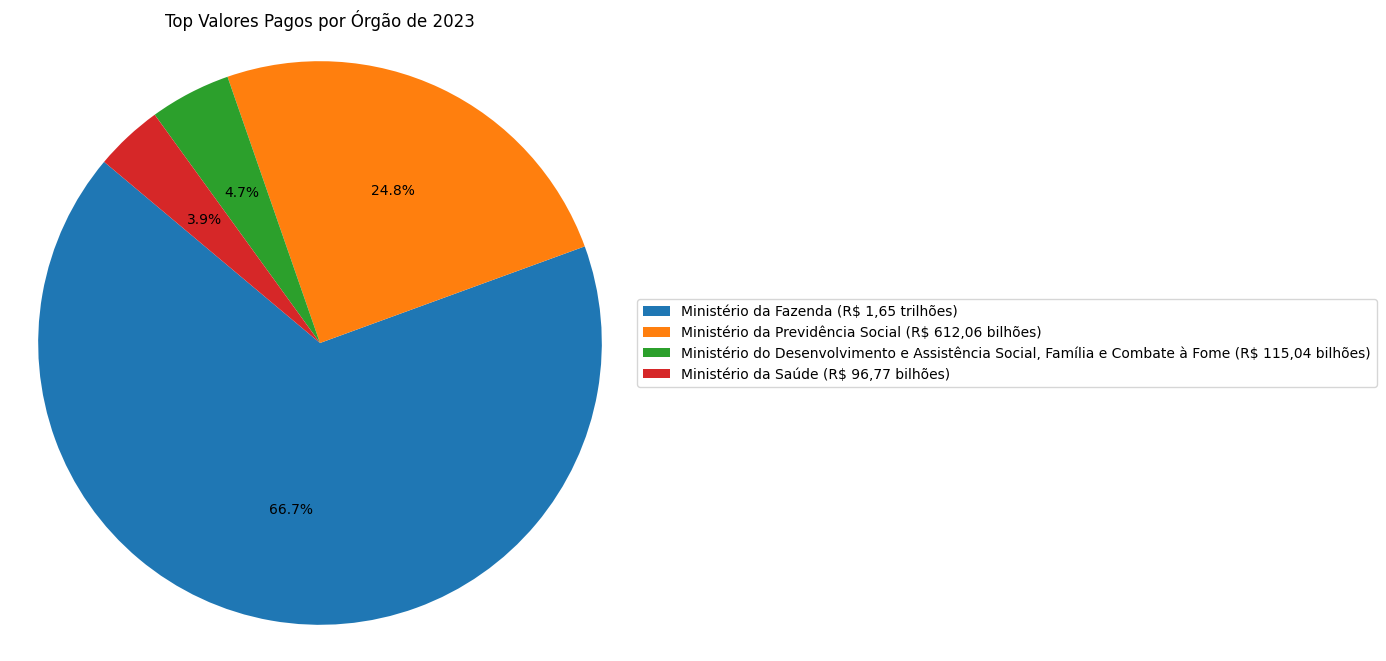

In [115]:
plt.figure(figsize=(8, 8))
wedges, labels, autopct = plt.pie(top_valor_pago, autopct='%1.1f%%', startangle=140)

plt.title('Top Valores Pagos por Órgão de 2023')

legend_labels = [f'{label} ({format_currency(value)})' for label, value in zip(top_valor_pago.index.get_level_values(1), top_valor_pago)]
plt.legend(handles=wedges, labels=legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()

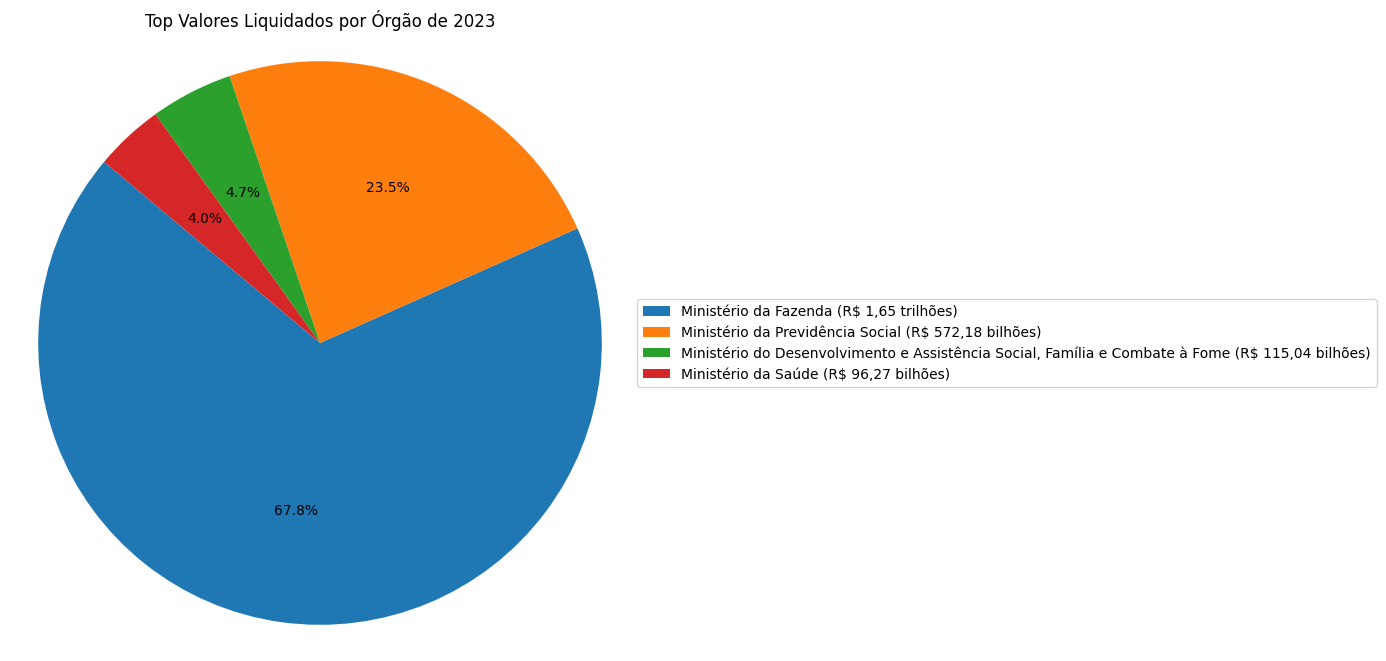

In [116]:
plt.figure(figsize=(8, 8))
wedges, labels, autopct = plt.pie(top_valor_Liquidado, autopct='%1.1f%%', startangle=140)

plt.title('Top Valores Liquidados por Órgão de 2023')

legend_labels = [f'{label} ({format_currency(value)})' for label, value in zip(top_valor_Liquidado.index.get_level_values(1), top_valor_Liquidado)]
plt.legend(handles=wedges, labels=legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()

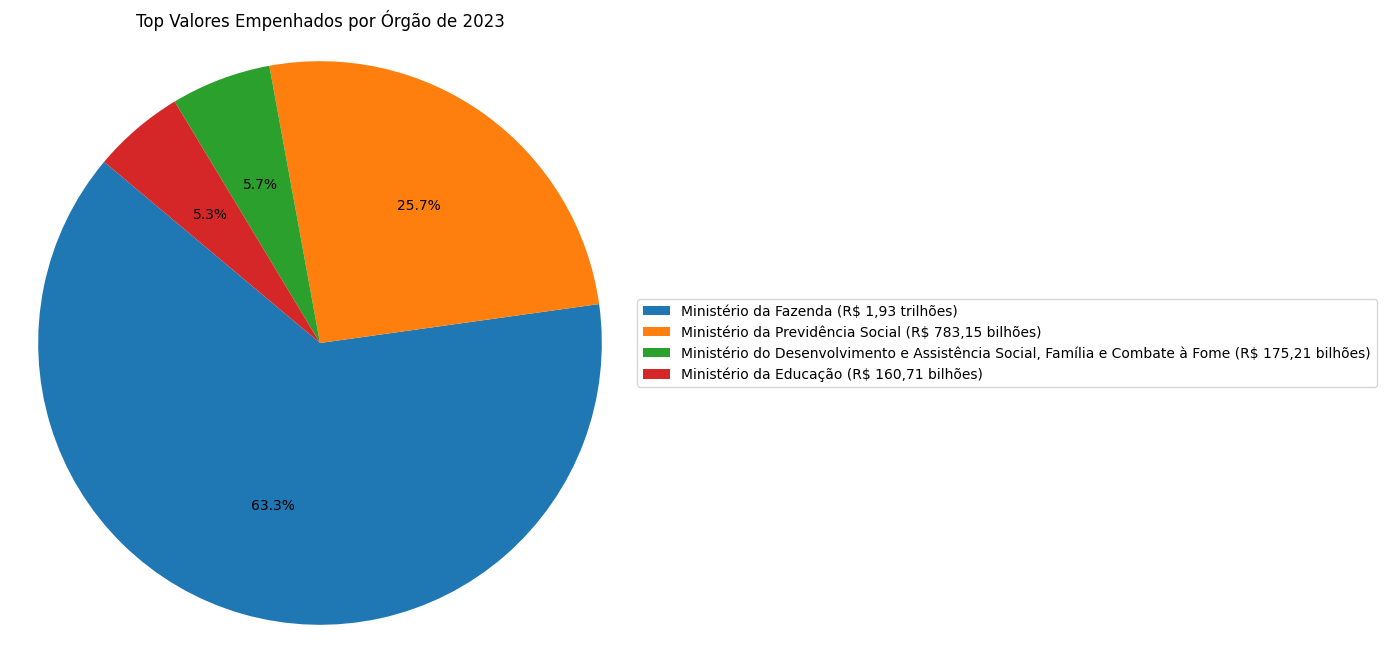

In [117]:
plt.figure(figsize=(8, 8))
wedges, labels, autopct = plt.pie(top_valor_empenhado, autopct='%1.1f%%', startangle=140)

plt.title('Top Valores Empenhados por Órgão de 2023')

legend_labels = [f'{label} ({format_currency(value)})' for label, value in zip(top_valor_empenhado.index.get_level_values(1), top_valor_empenhado)]
plt.legend(handles=wedges, labels=legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()

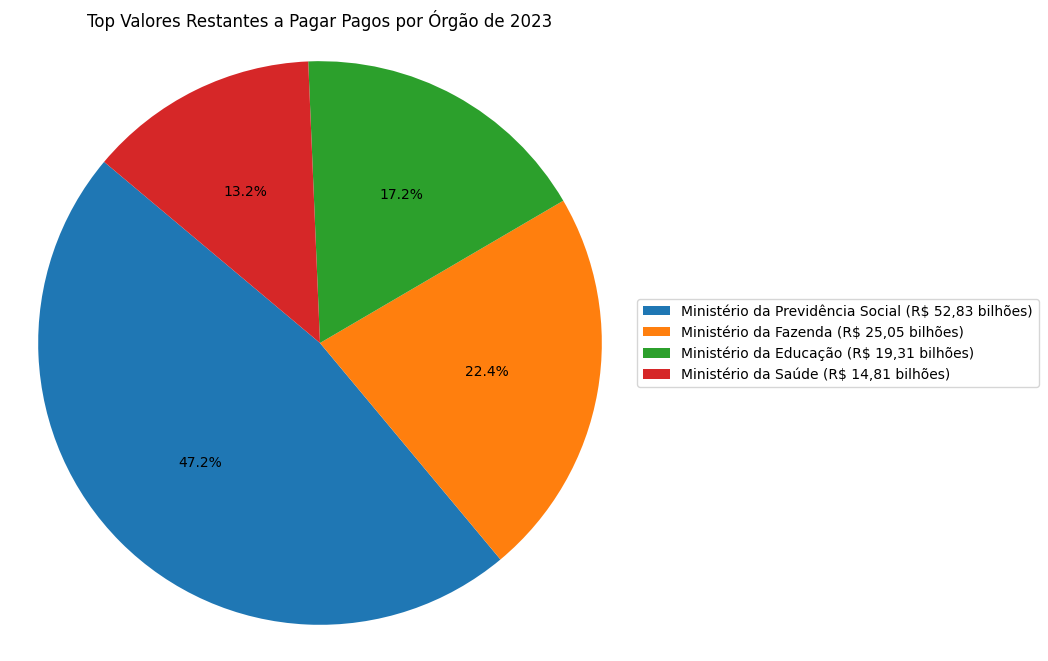

In [118]:
plt.figure(figsize=(8, 8))
wedges, labels, autopct = plt.pie(top_valor_restos, autopct='%1.1f%%', startangle=140)

plt.title('Top Valores Restantes a Pagar Pagos por Órgão de 2023')

legend_labels = [f'{label} ({format_currency(value)})' for label, value in zip(top_valor_restos.index.get_level_values(1), top_valor_restos)]
plt.legend(handles=wedges, labels=legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()